### Setup the paths to find models and run simulators

In [1]:
import sys,os

sys.path.append('/Users/rgerkin/Dropbox/dev/neurotools')
sys.path.append('/Users/rgerkin/Dropbox/dev/sciunit')
sys.path.append('/Users/rgerkin/Dropbox/dev')

os.environ['NC_HOME'] = '/Users/rgerkin/Dropbox/dev/neuroConstruct'
os.environ['JYTHON_HOME'] = '/Users/rgerkin/jython2.7b1'
os.environ['HOME'] = '/Users/rgerkin'
os.environ['PWD'] = '/Users/rgerkin/Dropbox/dev/neuroConstruct'
os.environ['PATH'] = '/usr/gnu/bin:/usr/local/bin:/bin:/usr/bin:/usr/sbin:/Applications/NEURON/nrn/x86_64/bin:.'
os.environ['PYTHONPATH'] = '/Users/rgerkin/Dropbox/dev/neurotools:/Users/rgerkin/Dropbox/dev/sciunit:/Users/rgerkin/Dropbox/dev:/Users/rgerkin/Dropbox/dev/neuroConstruct/pythonnC'

### Setup the plotting environment

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
if mpl.rcParams['text.usetex']:
    raise RuntimeError("this mode is not compatible with text.usetex = True")
plt_txt_size = 20
plt.rcParams.update({'font.family' : 'serif',
                     'font.size' : plt_txt_size,
                     'axes.linewidth' : 0.5,
                     'legend.fontsize' : plt_txt_size,
                     'legend.frameon' : False,
                     'legend.numpoints' : 1,
                     'figure.figsize': (12, 6)})

###Import testing frameworks

In [3]:
# Installed packages.  
import sciunit
from neuronunit import neuroelectro,tests,capabilities
import neuronunit.neuroconstruct.models as nc_models
from pythonnC.utils.putils import OSB_MODELS

###Select a cerebellar granule cell

In [4]:
brain_area = 'cerebellum'
neuron_type = 'cerebellar_granule_cell'
path = os.path.join(OSB_MODELS,brain_area,neuron_type)
neurolex_id = 'nifext_128' # Cerebellar Granule Cell

###Instantiate a resting potential test for this cell type using neuroelectro.org data

In [5]:
# Specify reference data for this test.  
reference_data = neuroelectro.NeuroElectroSummary(
    neuron = {'nlex_id':neurolex_id}, # Neuron type.  
    ephysprop = {'name':'Resting Membrane Potential'}) # Electrophysiological property name. 
# Get and verify summary data for the combination above from neuroelectro.org. 
if reference_data.get_values() is None:
    raise ValueError("Unable to get the reference data from NeuroElectro.org.")

vm_test = tests.RestingPotentialTest(
                observation = {'mean':reference_data.mean,
                               'std':reference_data.std},
                name = 'Resting Potential')

Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nifext_128&e__name=Resting+Membrane+Potential


###Instantiate an action potential width test for this cell type using neuroelectro.org data

In [6]:
# Specify reference data for this test.  
reference_data = neuroelectro.NeuroElectroSummary(
    neuron = {'nlex_id':neurolex_id}, # Neuron type.  
    ephysprop = {'name':'Spike Half-Width'}) # Electrophysiological property name. 
# Get and verify summary data for the combination above from neuroelectro.org. 
if reference_data.get_values() is None:
    raise ValueError("Unable to get the reference data from NeuroElectro.org.")

spikewidth_test = tests.InjectedCurrentSpikeWidthTest(
                observation = {'mean':reference_data.mean,
                               'std':reference_data.std},
                name = 'Spike Width',
                params={'injected_current':{'ampl':0.0053}}) # 0.0053

Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nifext_128&e__name=Spike+Half-Width


###Create a test suite from the tests above

In [7]:
suite = sciunit.TestSuite('Tests',(spikewidth_test,vm_test))

###Select granule cell models from opensourcebrain.org to take these tests

In [8]:
if not os.path.isdir(path):
    raise IOError('No such path: %s' % path)
model_names = os.listdir(path)
models = []
bad_models = ['GranCellRothmanIf']
good_models = ['GranuleCell','cereb_grc_mc']
for model_name in model_names:
    print(model_name)
    if model_name in bad_models:
        continue
    model_info = (brain_area,neuron_type,model_name)
    model = nc_models.OSBModel(*model_info)
    if model_name in good_models: # Currently the only one that actually produces reasonable spikes.  
        models.append(model)

cereb_grc_mc
Instantiating a neuroConstruct model from /Users/rgerkin/Dropbox/dev/neuroConstruct/osb/cerebellum/cerebellar_granule_cell/cereb_grc_mc/neuroConstruct.
GranCellRothmanIf
GranCellSolinasEtAl10
Instantiating a neuroConstruct model from /Users/rgerkin/Dropbox/dev/neuroConstruct/osb/cerebellum/cerebellar_granule_cell/GranCellSolinasEtAl10/neuroConstruct.
GranuleCell
Instantiating a neuroConstruct model from /Users/rgerkin/Dropbox/dev/neuroConstruct/osb/cerebellum/cerebellar_granule_cell/GranuleCell/neuroConstruct.
GranuleCellVSCS
Instantiating a neuroConstruct model from /Users/rgerkin/Dropbox/dev/neuroConstruct/osb/cerebellum/cerebellar_granule_cell/GranuleCellVSCS/neuroConstruct.


###Execute the test suite

In [9]:
# (1) Check capabilities,
# (2) take the test, 
# (3) generate a score and validate it,
# (4) bind the score to model/test combination. 

score_matrix = suite.judge(models,stop_on_error=True)    

Waiting for socket to be open on port 8889...
Waiting for socket to be open on port 8889...
Running simulation...
Runtime methods are {}
Receiving sim dir
Received sim dir
Getting membrane potential from /Users/rgerkin/Dropbox/dev/neuroConstruct/osb/cerebellum/cerebellar_granule_cell/cereb_grc_mc/neuroConstruct/simulations/DefaultSimulationConfiguration__N/CG_KA_0
There are 0 spikes
Spike widths are []
Spike Width: Observation = {'mean': 0.93, 'std': 0.216487105081727}, Prediction = {'mean': nan, 'std': nan}
Terminating subprocess used to create previous socket.
Waiting for socket to be open on port 8889...
Waiting for socket to be open on port 8889...
Running simulation...
Runtime methods are {}
Receiving sim dir
Received sim dir
Getting membrane potential from /Users/rgerkin/Dropbox/dev/neuroConstruct/osb/cerebellum/cerebellar_granule_cell/GranuleCell/neuroConstruct/simulations/DefaultSimulationConfiguration__N/Gran_0
There are 1 spikes
Spikes has duration 500 samples, and sample 250

###View the test results

In [10]:
score_matrix.view()

,Spike Width (InjectedCurrentSpikeWidthTest),Resting Potential (RestingPotentialTest)
cereb_grc_mc (OSBModel),Z = nan,Z = 4.92
GranuleCell (OSBModel),Z = -3.56,Z = 0.88


###Plot the simulation data from one of the tests

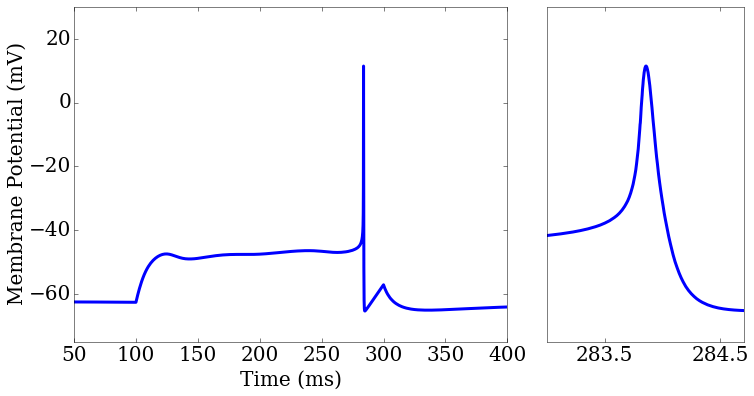

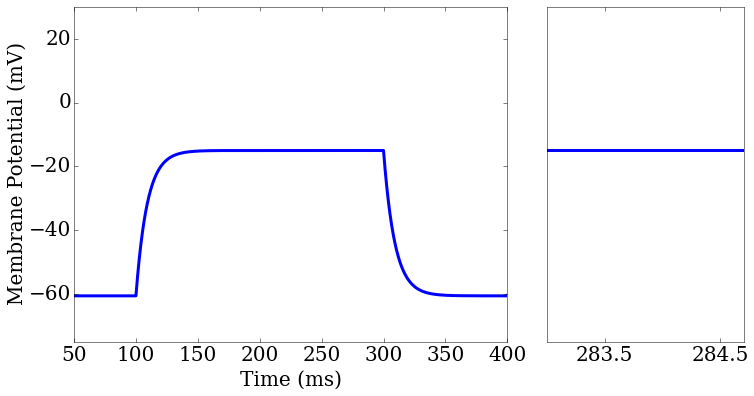

In [11]:
prefix = '/Users/rgerkin/dev/neuroConstruct/osb/cerebellum/cerebellar_granule_cell'
suffix = 'neuroConstruct/simulations/DefaultSimulationConfiguration__N'
for model_name,group in [('GranuleCell','Gran_0'),
                         ('GranCellSolinasEtAl10','GranCell_CML_0'),
                         ('GranuleCellVSCS','SampleCellGroup_0'),
                         ('cereb_grc_mc','CG_KA_0')]:
    if model_name not in good_models:
        continue
    plt.figure()
    ax1 = plt.subplot2grid((1,3), (0,0), colspan=2)
    ax2 = plt.subplot2grid((1,3), (0,2), colspan=1)
    path = os.path.join(prefix,model_name,suffix)
    t = np.loadtxt(os.path.join(path,'time.dat'))
    vm = np.loadtxt(os.path.join(path,'%s.dat' % group))
    ax1.plot(t,vm,label=model_name,linewidth=3)
    ax2.plot(t,vm,label=model_name,linewidth=3)
    ax1.set_xlabel("Time (ms)")
    ax1.set_ylabel("Membrane Potential (mV)")
    ax1.set_xlim(50,400)
    ax2.set_xlim(283,284.7)
    ax1.set_ylim(-75,30)
    ax2.set_ylim(-75,30)
    ax2.set_xticks([283.5,284.5])
    ax2.set_yticks([])
    #plt.legend()
    plt.savefig('sdsf.pdf',format='pdf')